In [1]:
!pip install selenium

   ---------------------------------------- 7.2/7.2 MB 13.1 MB/s eta 0:00:00
   --------------------------------------- 400.2/400.2 kB 26.0 MB/s eta 0:00:00


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [4]:
browser = webdriver.Chrome(options=options)

In [6]:
browser.get('https://books.toscrape.com/')

In [7]:
titles = []
prices = []

In [35]:
while len(titles) < 20:
    books = browser.find_elements(By.CSS_SELECTOR, '.product_pod')

    for book in books:
        title = book.find_element(By.CSS_SELECTOR, 'h3 a').get_attribute('title')
        price = book.find_element(By.CSS_SELECTOR, '.price_color').text
        price = float(price.replace('£',''))
        titles.append(title)
        prices.append(price)

        if len(titles) >= 20:
            break
    try:
        next_button = browser.find_element(By.CSS_SELECTOR, '.next a')
        next_button.click()
        time.sleep(2)  # Add a slight delay for page loading
    except:
        print("No more pages.")
        break
browser.quit()

In [36]:
df = pd.DataFrame({'Title': titles, 'Price (£)': prices})

In [37]:
print(df.head())

                                   Title  Price (£)
0                   A Light in the Attic      51.77
1                     Tipping the Velvet      53.74
2                             Soumission      50.10
3                          Sharp Objects      47.82
4  Sapiens: A Brief History of Humankind      54.23


In [38]:
df

,Title,Price (£)
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets of Getting Your Dream...,33.34
7,The Coming Woman: A Novel Based on the Life of...,17.93
8,The Boys in the Boat: Nine Americans and Their...,22.60
9,The Black Maria,52.15


In [41]:
import matplotlib.pyplot as plt

In [40]:
pip install matplotlib

  Using cached cycler-0.11.0-py3-none-any.whl.metadata (785 bytes)
  Using cached fonttools-4.38.0-py3-none-any.whl.metadata (138 kB)
   ---------------------------------------- 7.2/7.2 MB 13.1 MB/s eta 0:00:00
Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
   ---------------------------------------- 55.8/55.8 kB ? eta 0:00:00
   ---------------------------------------- 2.5/2.5 MB 26.9 MB/s eta 0:00:00
   ---------------------------------------- 104.1/104.1 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


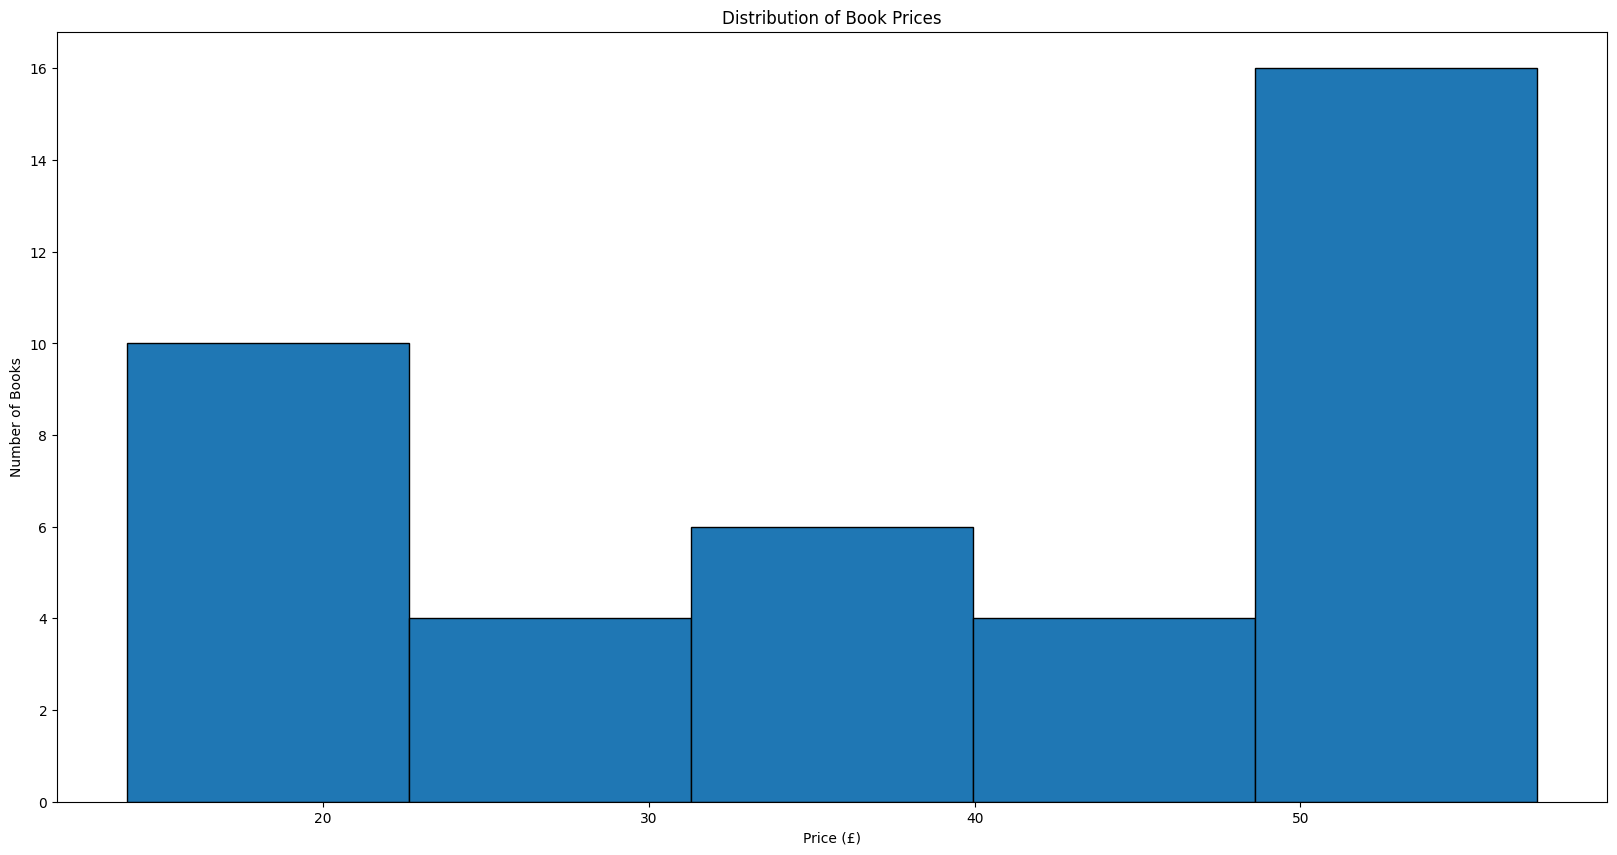

In [51]:
plt.figure(figsize = (20,10))
plt.hist(df['Price (£)'], bins=5, edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.show()

In [69]:
import time

In [70]:
browser = webdriver.Chrome(options=options)
browser.get('https://books.toscrape.com/')
titles = []
quantities = []

elements = browser.find_elements(By.CSS_SELECTOR, '.product_pod')
for element in elements:
    
    title = element.find_element(By.CSS_SELECTOR, 'h3 a').get_attribute('title')
    titles.append(title)
    element.find_element(By.CSS_SELECTOR, 'h3 a').click()
    
    
    qty = browser.find_element(By.CSS_SELECTOR,'.instock.availability').text
    quant = int(qty.split()[2].replace('(',''))
    quantities.append(quant)
    browser.back()
    try:
        next_button = browser.find_element(By.CSS_SELECTOR, '.next a')
        next_button.click()
        time.sleep(2)
    except:
        print("No more pages.")
        break
browser.quit()

KeyboardInterrupt: 

In [65]:
print("Quantities collected:", quantities)

Quantities collected: [22]


In [62]:
import statistics

In [66]:
if len(quantities) > 1:
    mean_qty = statistics.mean(quantities)
    stdev_qty = statistics.stdev(quantities)
    print(f"Mean quantity: {mean_qty}")
    print(f"Standard deviation of quantities: {stdev_qty}")
elif len(quantities) == 1:
    print("Only one quantity found, standard deviation cannot be calculated.")
    mean_qty = quantities[0]
    print(f"Mean quantity: {mean_qty}")
else:
    print("No quantities were collected.")

Only one quantity found, standard deviation cannot be calculated.
Mean quantity: 22


In [68]:
print(f"Mean quantity: {mean_qty}")
print(f"Standard deviation of quantities: {stdev_qty}")

Mean quantity: 22


NameError: name 'stdev_qty' is not defined